# Hausaufgabe 3 − Companion
<!-- Lizensiert unter (CC BY 4.0) 2021, Gert Herold -->

>When tears are in your eyes, I will dry them all<br>
>I'm on your side, when times get rough<br>
> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&mdash; <cite>[Paul Simon](https://www.youtube.com/watch?v=4G-YQA_bsOU)</cite>


Wenn Sie bei der Bearbeitung der Hausaufgabe das Gefühl haben, nicht weiterzukommen oder nicht einmal einen Ansatz zur Lösung zu sehen − keine Sorge: Sie sind nicht die ersten und Sie sind nicht allein. Und: bisher haben es noch alle geschafft. Also, machen Sie sich einen Tee in einer Tasse, die nicht so leicht umkippt, legen Sie eine entspannte Musik auf und setzen Sie sich gemütlich an die Tastatur.

In diesem Dokument finden Sie zunächst einige Strategien, die Ihnen unabhängig vom konkreten Problem helfen können, Ihr Programm dazu zu bringen, das zu machen, was es soll.
Im zweiten Teil werden wir einige konkrete Schritte durchführen, um der Lösung von HA 3 näher zu kommen. 

*Dieses Dokument ist **nicht** Teil Ihrer HA3-Abgabe/-Abnahme, sondern nur zur Unterstützung oder z.B. als Grundlage für Fragen da.*

## Teil 1: Debugging

Unter Debugging versteht man den Prozess der Behebung von Programmfehlern (Bugs). 
Diese Fehler können unterschiedlichen Typs sein (z.B. Syntaxfehler oder logische Fehler).
Viele Programmierumgebungen bringen einen _Debugger_ mit; das ist ein Programm, das Unterstützung bei der Fehlersuche bietet, z.B. durch das gezielte Steuern (Teilausführung, Unterbrechungen) des Programmablaufs sowie die Überwachung der erzeugten Daten.
Wenn Sie die Anaconda-Python-Distribution installiert haben, haben Sie vielleicht schon den Spyder-Editor entdeckt, eine [integrierte Entwicklungsumgebung](https://de.wikipedia.org/wiki/Integrierte_Entwicklungsumgebung), die unter anderem auch einen Debugger mitbringt.

Die eingebauten Debugging-Möglichgkeiten im JupyterLab sind aktuell (noch) sehr beschränkt. Es gibt dennoch einige Dinge, die Sie tun können, um Fehlern auf die Schliche zu kommen − oder sogar ihrer Entstehung vorzubeugen.
  
  1. Teilen Sie ein komplexes Problem in kleinere Unterprobleme auf und testen Sie diese separat.
  2. Testen Sie Ihren Code mit vereinfachten Daten. Vereinfachen Sie möglichst so weit, dass Sie "per Hand" nachrechnen können, ob das Ergebnis wie erwartet ist.
  3. Dokumentieren Sie Ihren Code ausführlich. Schreiben Sie im Kommentar unter den Funktionsheader und über oder hinter eine wichtige Zeile, was darin eigentlich geschehen soll bzw. was sie bedeutet. Es ist nicht ungewöhnlich, wenn der Dokumentationstext umfangreicher als das eigentliche Programm ist.
  4. Geben Sie (während der Entwicklung) im Programmlauf immer mal wieder Variablen aus, um zu überprüfen, ob deren Werte wie erwartet sind.
  5. Visualisieren Sie (Zwischen-)Ergebnisse, die als Text nicht hilfreich sind, grafisch.
  6. Lesen Sie die Fehlermeldungen, die ausgegeben werden, ausführlich. Lesen Sie von oben nach unten und folgen Sie den genannten Zeilenangaben.
  7. Lesen Sie die Dokumentation der verwendeten Funktionen.
  8. Ändern Sie immer nur einzelne Aspekte, bevor Sie neu testen.
  9. Lassen Sie sich helfen! Nutzen Sie das "Python-Hilfe"-Forum. Erstellen Sie hierfür ein funktionsfähiges [Minimalbeispiel](https://en.wikipedia.org/wiki/Minimal_working_example). Nutzen Sie ggf. die angebotenen Sprechstunden. Auch hierfür sind [gut aufbereitete](https://stackoverflow.com/help/minimal-reproducible-example)  Minimalbeispiele hilfreich.
     
  
<!-- https://www.youtube.com/watch?v=U_O1QKQCsGs-->

## Teil 2: Hilfreiche PMCs

Im Folgenden finden Sie einige Teilaufgaben, die Ihnen möglicherweise bei der Lösung helfen. Bearbeiten Sie auch das Notebook "Hinweise zur Kreuzkorrelation".
Zunächst importieren wir dieselben Pakete wie in der HA und erstellen uns ein Array mit Zufallszahlen:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

np.random.seed(17)
a = np.random.randn(10,10)
a-=a.min()
a

array([[3.67619667, 1.5453027 , 4.02383189, 4.54524207, 4.43712125,
        5.28656971, 3.28823249, 3.03782944, 3.54860582, 2.96214763],
       [5.57118778, 4.55224103, 1.58111844, 3.26188144, 3.93977039,
        1.62464849, 4.71480732, 2.92648273, 2.30770088, 3.14990334],
       [2.41763648, 4.43119987, 3.89126455, 2.95328418, 2.5935707 ,
        3.53119854, 2.18737054, 3.55992163, 2.64470774, 3.74982677],
       [4.37747254, 3.26134553, 3.50378708, 3.70052182, 4.36813607,
        4.26955462, 3.96771387, 3.86521312, 2.2345577 , 1.36393599],
       [2.24451748, 6.74508817, 3.52665799, 2.70575188, 3.95760521,
        3.49907738, 4.03785695, 4.10304146, 2.48383763, 2.61391655],
       [4.51911258, 2.41653467, 3.6444508 , 2.81852104, 3.82949468,
        4.19833277, 2.78986073, 4.58533499, 2.68909677, 2.61880185],
       [3.1695578 , 3.52012586, 2.61146094, 0.43980816, 2.60434966,
        3.68451303, 3.92246806, 3.48348522, 6.12072637, 4.01093866],
       [2.56398678, 3.39623474, 3.7930254

Als nächstes wollen wir das Array ein wenig kennenlernen.

**HA3C.1) Finden Sie das Maximum im 2D-Array `a` und zeichnen Sie an der entsprechenden Stelle ein rotes 'x' in das Bild ein.**

In [2]:
def plot_B(b,minX=False,colbar=False):
    plt.figure(1,figsize=(3,3))
    plt.imshow(b)
    if minX == True:
        pos_min =np.unravel_index(np.argmin(b), b.shape)
        plt.plot(pos_min[1],pos_min[0],'xr')
        plt.title(f'mean = {np.mean(b):.3f}')
    if colbar == True:
        plt.colorbar()

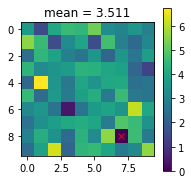

In [3]:
plot_B(a,minX=True,colbar=True)

In der HA soll das Bild ja in Unterbereiche aufgeteilt werden. Das können wir ja gleich hier mal üben.

**HA3C.2) Teilen Sie das Array `a` in 3x3 Unter-Arrays mit je 3x3 Einträgen auf und stellen Sie diese Arrays entsprechend ihrer [Anordnung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) im Ausgangs-Array dar. Verwerfen Sie Daten, die nicht mehr in das 3x3-Schema passen.**  

Die Lösung sollte in etwa so aussehen:

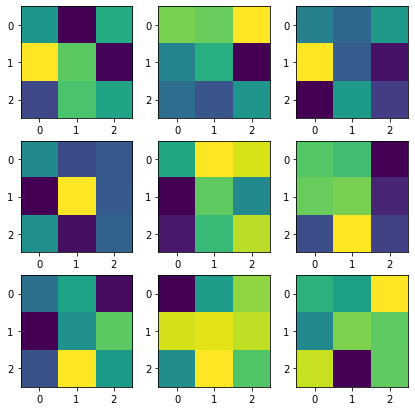 

Diskutieren Sie die Unterschiede zur Visualisierung in der vorangegangenen Aufgabe. (*Warum sind die Farben anders?*)

In [4]:
def teilenB_MxN(b,M,N):
    """
    Teilen Bild in MxN-Stück kleinere Bilder in MxN-Matrix
    """
    B = []
    m = len(b)//M
    n = len(b[0])//N

    if m == 0 or n == 0:
        raise Exception('invalid operation')

    for i in range(m,M*m+1,m):
        for j in range(n,N*n+1,n):
            B.append(b[i-m:i,j-n:j])

    return np.array(B).reshape(M,N,m,n)

In [5]:
def plot_geteiltB(B,colbar=False):
    m,n,_,_ = B.shape
    fig, axs = plt.subplots(m,n,figsize=(7,7))
    
    if m == 1 and n == 1:
        im = axs.imshow(B[-1,-1,:,:])
        if colbar == True:
            plt.colorbar(im,ax=axs)
    elif m == 1 or n == 1:
        for i in range(m):
            for j in range(n):
                im = axs[i+j].imshow(B[i,j,:])
                if colbar == True:
                    plt.colorbar(im,ax=axs)
    else:
        for i in range(m):
            for j in range(n):
                im = axs[i][j].imshow(B[i,j,:,:])
                if colbar == True:
                    plt.colorbar(im,ax=axs[i][j])

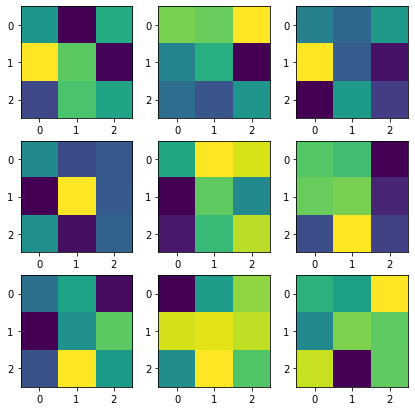

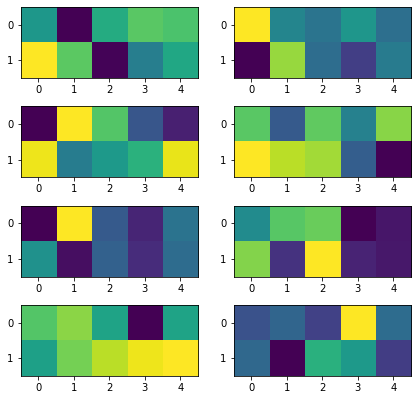

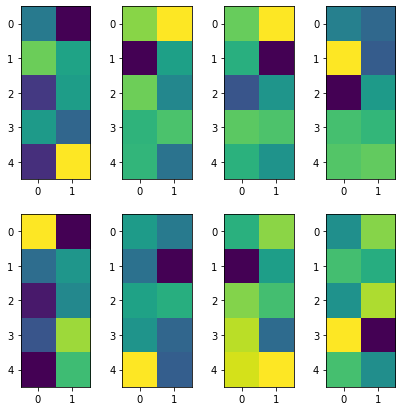

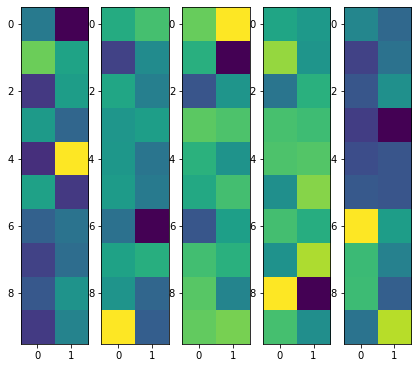

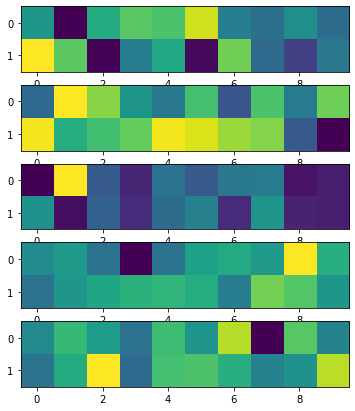

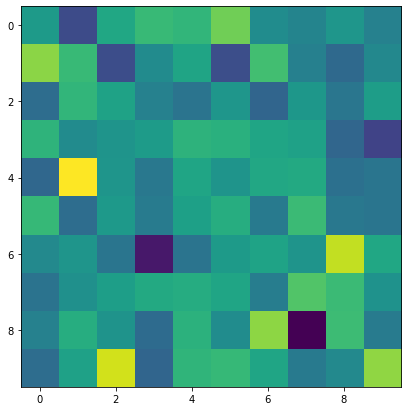

In [6]:
B = teilenB_MxN(a,3,3)
plot_geteiltB(B)
plot_geteiltB(teilenB_MxN(a,4,2))
plot_geteiltB(teilenB_MxN(a,2,4))
plot_geteiltB(teilenB_MxN(a,1,5))
plot_geteiltB(teilenB_MxN(a,5,1))
plot_geteiltB(teilenB_MxN(a,1,1))
#plot_geteiltB(teilenB_MxN(a,11,5))
#plot_geteiltB(teilenB_MxN(a,1,51))

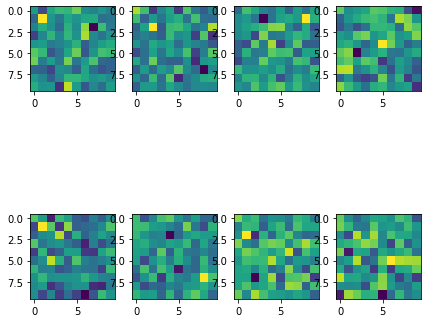

In [7]:
np.random.seed(17)
b = np.random.randn(20,40)
b -= b.min()
B = teilenB_MxN(b,2,4)
plot_geteiltB(B)

In [8]:
"""
def plot_MxN(b,M,N,colbar=False):
    B = []
    m = len(b)//M
    n = len(b[0])//N
    fig, axs = plt.subplots(M,N,figsize=(7,7))
    for i in range(m,M*m+1,m):
        for j in range(n,N*n+1,n):
            B.append(b[i-m:i,j-n:j])
            if M != 1 and N != 1:
                im = axs[int(i/m-1)][int(j/n-1)].imshow(B[-1])
                if colbar != False:
                    plt.colorbar(im,ax=axs[int(i/m-1)][int(j/n-1)])
            elif M == 1 and N == 1:
                im = axs.imshow(B[-1])
                if colbar != False:
                    plt.colorbar(im,ax=axs)
            elif M == 1:
                im = axs[int(j/n-1)].imshow(B[-1])
                if colbar != False:
                    plt.colorbar(im,ax=axs[int(j/n-1)])
            else:
                im = axs[int(i/m-1)].imshow(B[-1])
                if colbar != False:
                    plt.colorbar(im,ax=axs[int(i/m-1)])
plot_MxN(a,3,3)
np.random.seed(17)
A = np.random.randn(20,40)
A-=A.min()
plot_MxN(A,2,4)
"""

'\ndef plot_MxN(b,M,N,colbar=False):\n    B = []\n    m = len(b)//M\n    n = len(b[0])//N\n    fig, axs = plt.subplots(M,N,figsize=(7,7))\n    for i in range(m,M*m+1,m):\n        for j in range(n,N*n+1,n):\n            B.append(b[i-m:i,j-n:j])\n            if M != 1 and N != 1:\n                im = axs[int(i/m-1)][int(j/n-1)].imshow(B[-1])\n                if colbar != False:\n                    plt.colorbar(im,ax=axs[int(i/m-1)][int(j/n-1)])\n            elif M == 1 and N == 1:\n                im = axs.imshow(B[-1])\n                if colbar != False:\n                    plt.colorbar(im,ax=axs)\n            elif M == 1:\n                im = axs[int(j/n-1)].imshow(B[-1])\n                if colbar != False:\n                    plt.colorbar(im,ax=axs[int(j/n-1)])\n            else:\n                im = axs[int(i/m-1)].imshow(B[-1])\n                if colbar != False:\n                    plt.colorbar(im,ax=axs[int(i/m-1)])\nplot_MxN(a,3,3)\nnp.random.seed(17)\nA = np.random.ran

**HA3C.3) Wiederholen Sie Aufgabe HA3C.2, aber teilen Sie `a` nun in Unter-Arrays mit je 2x4 Einträgen auf (verwenden Sie so viele Daten aus dem Ausgangs-Array wie möglich). Halten Sie ihren Code so allgemein, dass sie nur die Parameter `M` und `N` ändern müssen, um die Dimension der Unter-Arrays zu 4x2 oder 1x5 zu ändern.**

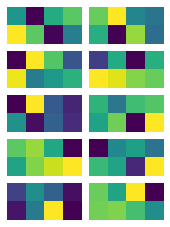&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
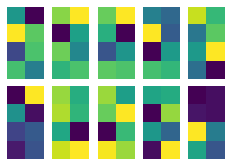&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
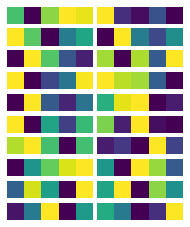 


In [9]:
def teilenB_mxn(b,m,n):
    """
    Teilen Bild in mxn-Bilder, so viele wie möglich
    """
    B = []
    M = len(b)//m
    N = len(b[0])//n
    MP = [] # Mittelpunkt

    if M == 0 or  N == 0:
        raise Exception('invalid operation')

    for i in range(m,M*m+1,m):
        for j in range(n,N*n+1,n):
            B.append(b[i-m:i,j-n:j])
            # MP.append([i-m//2,j-n//2]) # Mittelpunkt

    return np.array(B).reshape(M,N,m,n)

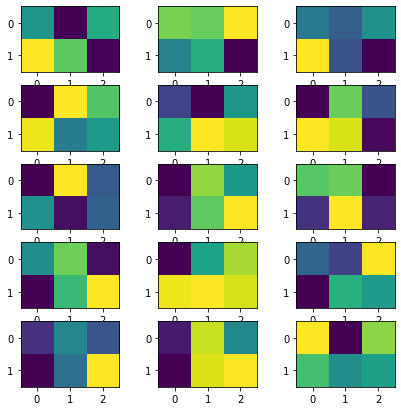

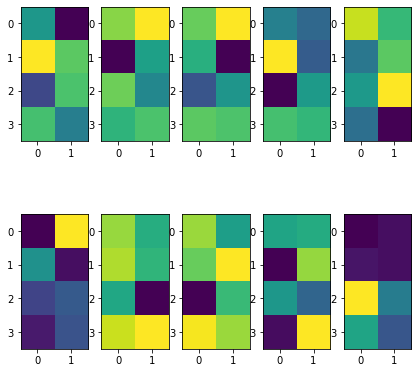

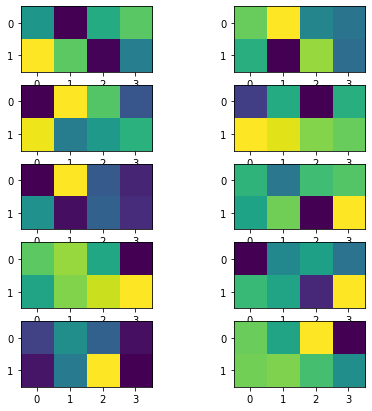

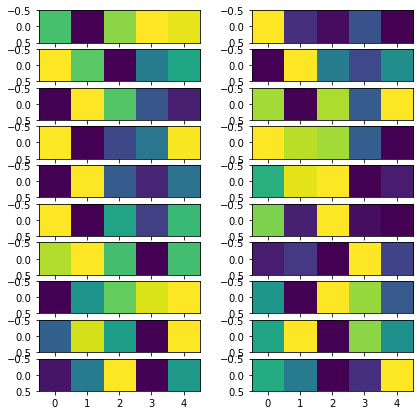

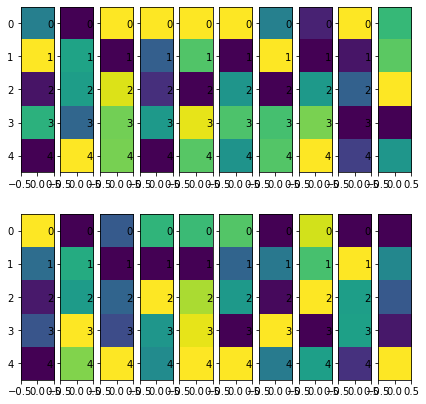

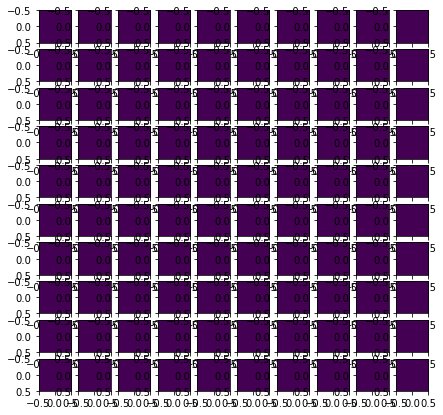

In [10]:
B = teilenB_mxn(a,2,3)
plot_geteiltB(B)
plot_geteiltB(teilenB_mxn(a,4,2))
plot_geteiltB(teilenB_mxn(a,2,4))
plot_geteiltB(teilenB_mxn(a,1,5))
plot_geteiltB(teilenB_mxn(a,5,1))
plot_geteiltB(teilenB_mxn(a,1,1))
#plot_geteiltB(teilenB_mxn(a,11,5))
#plot_geteiltB(teilenB_mxn(a,1,51))

Überlegen Sie, [wie](https://de.wikipedia.org/wiki/Padding_(Informatik)) wir es realisieren könnten, dass unabhängig von der gewählten Größe der Unterarrays doch alle Daten verwertet werden (also *keine* Daten verworfen, falls die Anzahl nicht aufgeht). Ob Sie für die Lösung von HA 3 einige Daten vom Bildrand verwerfen oder nicht, ist Ihnen überlassen.

Nebem dem Aufteilen in Unter-Arrays ist es in HA 3 auch notwendig, Berechnungen mit den einzelnen "herausgeschnittenen" Arrays vorzunehmen. Darum soll es in den folgenden Übungen gehen. Als exemplarisches Unter-Array nehmen wir hier das gesamte Array `a` und kopieren seinen Inhalt in zwei neue Arrays.

**HA3C.4) Setzen Sie den Werte `b1[2,5]` und `c1[-5,-2]` auf `8`. Erzeugen Sie zwei weitere Arrays `b2` und `c2` als Kopien von `b1` und `c1` , wo Sie bei denselben Indizes jeweils noch einmal `8` hinzuaddieren. Berechnen Sie die Mittelwerte aller Arrays.**

$$
\bar{a} \approx 3{,}511\\
\bar{b}_1 \approx 3{,}556\\
\bar{c}_1 \approx 3{,}565\\
\bar{b}_2 \approx 3{,}636\\
\bar{c}_2 \approx 3{,}645\\
$$

In [11]:
b1=a.copy()
c1=a.copy()
x = 8
b1[2,5] = x
#c1[-5,-2] = x
c1[-3,-2] = x # besser, wegen Asymmetrie
b2=b1.copy()
c2=c1.copy()
b2[2,5] += x
#c2[-5,-2] += x
c2[-3,-2] += x # besser, wegen Asymmetrie
print(f'mean_a = {np.mean(a):.3f}')
print(f'mean_a = {np.mean(b1):.3f}')
print(f'mean_a = {np.mean(c1):.3f}')
print(f'mean_a = {np.mean(b2):.3f}')
print(f'mean_a = {np.mean(c2):.3f}')

mean_a = 3.511
mean_a = 3.556
mean_a = 3.545
mean_a = 3.636
mean_a = 3.625


Unsere Arrays haben nur positive Werte. Das ist erstmal ja nicht schlimm, aber wir haben ja aus den "Hinweisen zur Kreuzkorrelation" gelernt, dass das beim Korrelieren zu Problemen führen kann.

**HA3C.5) Erzeugen Sie für jedes Array aus der letzten Teilaufgabe ein Array (z.B. für `b1` ein Array `b1m`), das dieselbe relative Verteilung an Werten hat, jedoch den Mittelwert 0. Visualisieren Sie die Arraywerte in einer Abbildung mit der Anordnung:**
```
[b1 ] [c1 ] [b2 ] [c2 ]
[b1m] [c1m] [b2m] [c2m]
```

In [12]:
am = (a - np.mean(a)).copy()
b1m = (b1 - np.mean(b1)).copy()
c1m = (c1 - np.mean(c1)).copy()
b2m = (b2 - np.mean(b2)).copy()
c2m = (c2 - np.mean(c2)).copy()

(20, 40)


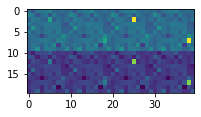

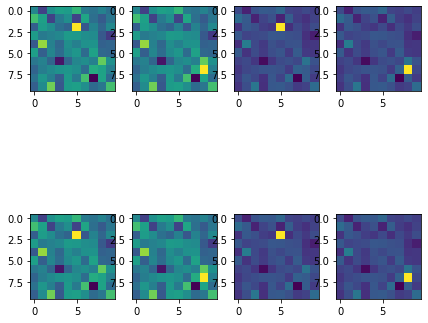

In [13]:
S1 = np.concatenate((b1,c1,b2,c2),axis=1)
S2 = np.concatenate((b1m,c1m,b2m,c2m),axis=1)
S = np.concatenate((S1,S2),axis=0)
print(S.shape)
plot_B(S)
B = teilenB_MxN(S,2,4)
plot_geteiltB(B)

Die beiden Zeilen sollten identisch aussehen bzw. sich dann unterscheiden, wenn Sie nach der Visualisierung für jedes Array noch eine Farbskala hinzufügen (`plt.colorbar()`).

**HA3C.6) Bestimmen Sie die [Kreuzkorrelationen](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html):**

$$
k_1 = b_1 \star c_1\\
k_{1m} = b_{1m} \star c_{1m}\\
k_2 = b_2 \star c_2\\
k_{2m} = b_{2m} \star c_{2m}\\
k_{aa} = a \star a\\
k_{amam} = a_{m} \star a_{m}\\
k_{aam} = a \star a_{m}\\
k_{ama} = a_{m} \star a\\
$$
$$

**und stellen Sie die sich ergebenden Arrays in folgender Anordnung dar:**

```
[k1 ] [k2 ] [kaa ]   [kaam ]
[k1m] [k2m] [kamam ] [kama ]
```

(38, 76)


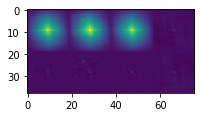

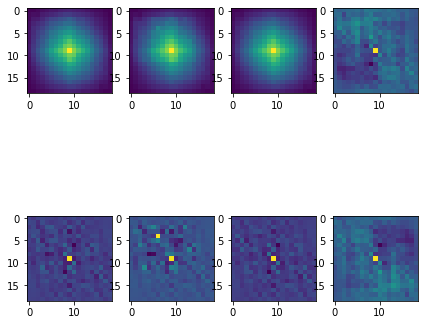

In [14]:
k1 = signal.correlate2d(b1,c1)
k1m = signal.correlate2d(b1m,c1m)
k2 = signal.correlate2d(b2,c2)
k2m = signal.correlate2d(b2m,c2m)
kaa = signal.correlate2d(a,a)
kamam = signal.correlate2d(am,am)
kaam = signal.correlate2d(a,am)
kama = signal.correlate2d(am,a)

K1 = np.concatenate((k1,k2,kaa,kaam),axis=1)
K2 = np.concatenate((k1m,k2m,kamam,kama),axis=1)
K = np.concatenate((K1,K2),axis=0)
print(K.shape)
plot_B(K)
B = teilenB_MxN(K,2,4)
plot_geteiltB(B)

In [15]:
def plot_3D(b1,b2):
    m,n = b1.shape
    x = np.arange(m)
    y = np.arange(n)
    X,Y = np.meshgrid(x, y)
    x,y,b1_,b2_ = X.ravel(), Y.ravel(), b1.ravel(), b2.ravel()
    bottom = np.zeros_like(b1_)
    width = depth = 1

    
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223, projection='3d')
    ax4 = fig.add_subplot(224, projection='3d')
    
    im1 =ax1.imshow(b1)
    plt.colorbar(im1,ax=ax1)
    im2 = ax2.imshow(b2)
    plt.colorbar(im2,ax=ax2)
    ax3.bar3d(x, y, bottom, width, depth, b1_, shade=True)
    ax4.bar3d(x, y, bottom, width, depth, b2_, shade=True)


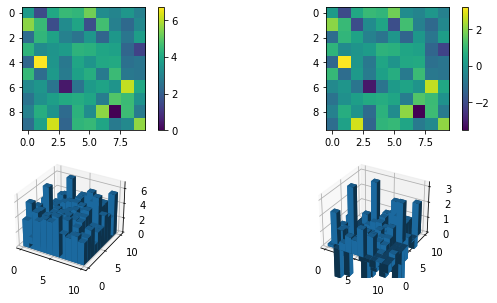

In [16]:
plot_3D(a,am)

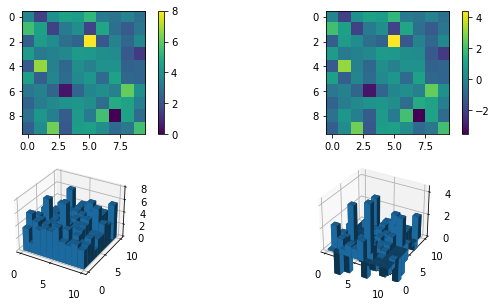

In [17]:
plot_3D(b1,b1m)

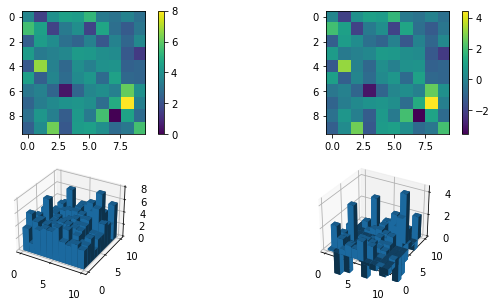

In [18]:
plot_3D(c1,c1m)

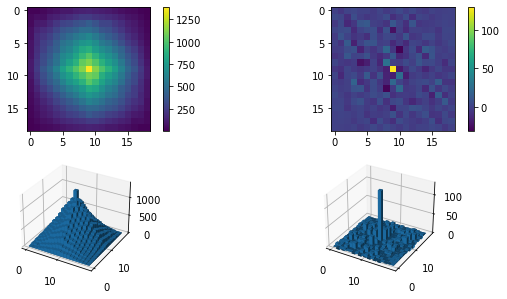

In [19]:
plot_3D(k1,k1m)

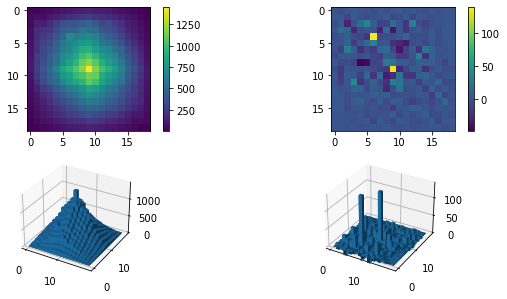

In [20]:
plot_3D(k2,k2m)

Diskutieren Sie: Was bedeuten diese Abbildungen und warum unterscheiden sich diesmal die Zeilen? Wie sähe das Ergebnis für ($a \star a$) und ($a_m \star a_m$) aus? Testen Sie auch mal, was passiert, wenn Sie das Ausgangs-Array `a` statt mit Zufallszahlen komplett mit Einsen füllen.

**HA3C.7) Berechnen Sie aus dem Ergebnis der vorangegangenen Teilaufgabe, wie viele vertikale und horizontale Pixel die hinzugefügten Werte in `b2` und `c2` auseinanderliegen.**

Wir wissen natürlich, wie weit diese auseinanderliegen, weil wir sie oben selbst hinzugefügt haben. Vergessen Sie dieses Wissen aber zunächst und versuchen Sie, die Abstände der Pixel aus den Korrelationsergebnissen zu ermitteln. Schauen Sie sich dazu ggf. auch noch mal den *Versatz* in den "Hinweisen zur Kreuzkorrelation" an. Am Ende sollten Sie sich wieder an unser Vorwissen erinnern, um zu überprüfen, ob das Rechenergebnis korrekt ist.

In [21]:
# Hier eigenen Code schreiben ...
def velocity_vector(search,interrogation):
    corr = signal.correlate2d(search,interrogation)         # Cross-Correlate-Matrix --> Dim:(sy+iy-1) x (sx+ix-1)
    maxpos =np.unravel_index(np.argmax(corr), corr.shape)   # Max-Pos. von Cross-Correlate-Matrix

    versatz_y = (len(search)+len(interrogation))//2-1       # y-Versatz
    versatz_x = (len(search[0])+len(interrogation[0]))//2-1 # x-Versatz
    
    v_y = maxpos[0]-versatz_y # y-Velocity
    v_x = maxpos[1]-versatz_x # x-Velocity
    
    return np.array([v_x,v_y])

v=[0 0]
v=[0 0]
v=[0 0]
v=[3 5]


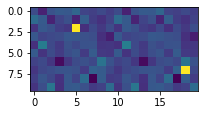

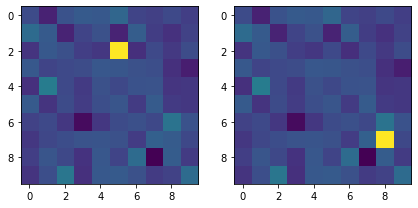

In [22]:
T = np.array([[b1,b1m,b2,b2m],[c1,c1m,c2,c2m]])
for b,c in zip(T[0],T[1]):
    print(f"v={velocity_vector(c,b)}")

C = np.concatenate((b2m,c2m),axis=1)
plot_B(C)
B = teilenB_MxN(C,1,2)
plot_geteiltB(B)

In [23]:
def plotBV(b,v,maxX=False):
    if maxX == True: # velocity from max-value
        my,mx =np.unravel_index(np.argmax(b), b.shape)
    else:            # velocity from midle-point
        my,mx = b.shape
        my = my//2
        mx = mx//2
    plt.figure(1,figsize=(3,3))
    plt.imshow(b)
    plt.plot(mx,my,'xr')
    plt.plot([mx,mx+v[0]],[my,my+v[1]],'r')
    plt.title(f'Velocitiy = {v}')

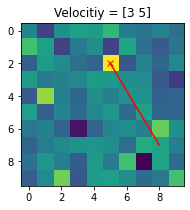

In [24]:
v = velocity_vector(c2m,b2m)
plotBV(b1,v,maxX=True)

Variieren Sie gern auch mal die entsprechenden Indizes in HA3C.4), um Ihren Code zu testen. Diskutieren Sie Teillösungen gern im "Python-Hilfe"-Forum, in Ihrem Freundeskreis oder mit Ihren Eltern oder Kindern. Reichen Sie *dieses* Dokument wie gesagt bitte *nicht* mit Ihrer HA3-Abgabe ein.

Wenn Sie hier alles korrekt berechnet und verstanden haben, sind Sie aber fast schon fertig mit HA 3 und können Ihr Wissen direkt in die eigentliche Hausaufgabe übertragen. **Viel Erfolg!**